In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [10]:
df = pd.read_csv('surrounding.csv')


sinα = np.sin(df[' angle motors / °'] * np.pi/180)
cosα = np.cos(df[' angle motors / °'] * np.pi/180)


dist_us = df[' distance ultrasonic / mm']


def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

dist_in = func(df[' distance infrared / %'].to_numpy(), *[ 2.02747202e-03, -8.64875976e-02,  1.00946960e+01,  2.26888545e+01])


df['xu'] = (dist_us + 65) * sinα + 40 * cosα
df['yu'] = (dist_us + 65) * cosα - 40 * sinα

df['xi'] = (dist_in + 65) * sinα - 40 * cosα
df['yi'] = (dist_in + 65) * cosα + 40 * sinα


# df['xc'] = df['xi'] * (dist_in <= 1300) + df['xu'] * (dist_us > 0.9 * dist_in) * (dist_us < 2550)
# df['yc'] = df['yi'] * (dist_in <= 1300) + df['yu'] * (dist_us > 0.9 * dist_in) * (dist_us < 2550)

df['xc'] = df['xi'] * (dist_in <= 1300)
df['yc'] = df['yi'] * (dist_in <= 1300)

df['xc'].replace(0, np.nan, inplace=True)
df['yc'].replace(0, np.nan, inplace=True)


# df

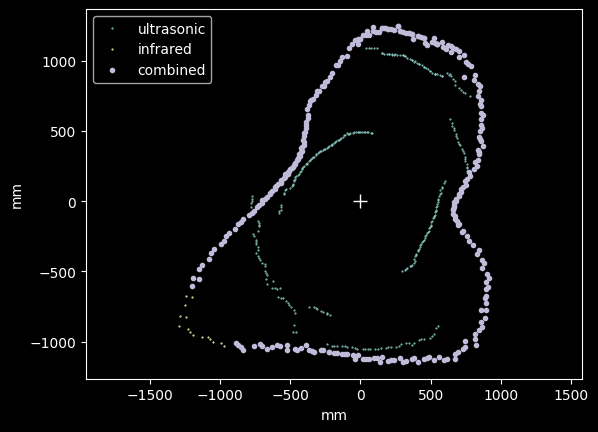

In [11]:
plt.plot(0, 0, 'w+', markersize = 10)
plt.plot(df['xu'], df['yu'], '.', markersize = 1, label = 'ultrasonic' )
plt.plot(df['xi'], df['yi'], '.', markersize = 1, label = 'infrared' )
plt.plot(df['xc'], df['yc'], 'o', markersize = 3, label = 'combined' )
plt.legend(loc = 'upper left')
plt.axis('equal')
plt.xlabel('mm')
plt.ylabel('mm')
# plt.xticks(range(-1500,1001,500))
# plt.yticks(range(-1000,1001,500))
# plt.ylim([-1200, 1200])

plt.show()
# plt.savefig('surrounding.png', transparent=True)